# Overview:
### This is the data of bank defaulter who took loan but not deposited

In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
# checking for number of rows and coulumns
df.shape

(11162, 17)

# How many defaults are there ?

In [5]:
df[df['default']=='yes'].count()[0]

168

# check if any feature is correlating here ??

In [11]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


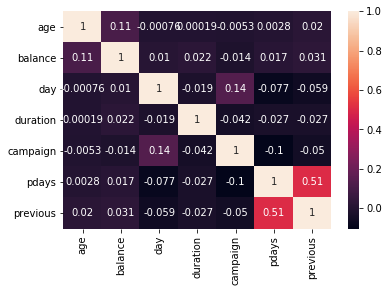

In [12]:
sns.heatmap(df.corr(), annot=True)

# NOTHING IS CORRELATING HERE

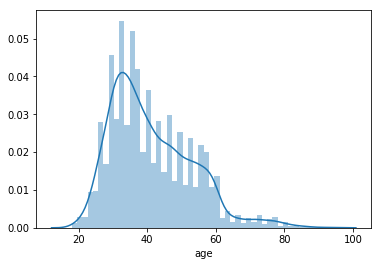

In [13]:
# checking for outliers with age of customers
# By ploting
sns.distplot(df.age)

In [14]:
# Checking for outliers in balance variable 

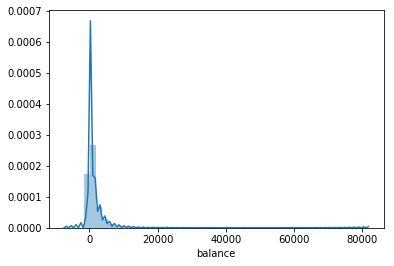

In [15]:
sns.distplot(df.balance)

In [16]:
df.balance.describe()

count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

# Lets prepare the data for machine learning

## 1. Preprocess the data (converting non-numeric values to numeric values)

In [17]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
    res_df['education'] = le.fit_transform(res_df['education'])
    res_df['default'] = le.fit_transform(res_df['default'])
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['loan'] = le.fit_transform(res_df['loan'])
    res_df['contact'] = le.fit_transform(res_df['contact'])
    res_df['month'] = le.fit_transform(res_df['month'])
    res_df['poutcome'] = le.fit_transform(res_df['poutcome'])
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
    return res_df

In [18]:
Encoded_df = preprocessor(df)
Encoded_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


## Steps to train a model

- we'll use Encoded data to train the model because model understands only numeric values
1. Define x and y from dataframe
2. x will be entire data except target variable/column and
3. y will be our target variable/column
- in this dataset my traget variable (y) is default column

### here our target column is default i am storing entire data except default in new variable x

In [19]:
x = Encoded_df.drop('default',axis=1).values
x

array([[59,  0,  1, ...,  0,  3,  1],
       [56,  0,  1, ...,  0,  3,  1],
       [41,  9,  1, ...,  0,  3,  1],
       ...,
       [32,  9,  2, ...,  0,  3,  0],
       [43,  9,  1, ...,  5,  0,  0],
       [34,  9,  1, ...,  0,  3,  0]], dtype=int64)

### now i am storing our target culumn data in y variable

In [21]:
y = Encoded_df['default'].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
print(df[df['default']=='yes'].count()[0])
print(df.shape)

168
(11162, 17)


In [24]:
# Total Number of 1's in target data

Encoded_df[Encoded_df['default']==1].count()[0]

168

### It means Yes is converted as 1 after preprocessing

# Training a model using x and y variable data

In [25]:
# here we are keeping train, test ratio is 80:20

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Checking rows of trained and testing data

In [26]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8929, 16)
(8929,)
(2233, 16)
(2233,)


# Make the decision Tree using CART method

### Making decision tree model with max depth = 2

In [27]:
model_2_dt = DecisionTreeClassifier(max_depth=2)

In [28]:
# Fitting Train and test data accroding to model 2

model_2_dt.fit(x_train,y_train)
model_2_dt.fit(x_test,y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# checking the score of trained and test data

In [29]:
model_2_score_train_data = model_2_dt.score(x_train,y_train)
model_2_score_test_data = model_2_dt.score(x_test,y_test)
print("Score of Train data = ",model_2_score_train_data)
print("Score of Test data = ",model_2_score_test_data)

Score of Train data =  0.9837607794825849
Score of Test data =  0.9861173309449172


# Making decision tree model with max depth = 4

In [30]:
model_4_dt = DecisionTreeClassifier(random_state=1, max_depth=4)

In [31]:
# Fitting Train and test data accroding to model 4

model_4_dt.fit(x_train,y_train)
model_4_dt.fit(x_test,y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

# checking the score of trained and test data

In [32]:
model_4_score_train_data = model_4_dt.score(x_train,y_train)
model_4_score_test_data = model_4_dt.score(x_test,y_test)
print("Score of Train data = ",model_4_score_train_data)
print("Score of Test data = ",model_4_score_test_data)

Score of Train data =  0.9781610482696831
Score of Test data =  0.9879086430810569


# confusion matrix

In [33]:
#pridiction of trained data of x_train
prediction = model_2_dt.predict(x_train)

prediction

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
# lets check the shape of trained and prediction data
print(prediction.shape)
print(y_train.shape)

(8929,)
(8929,)


In [41]:
# lets count how 1's are in pridicted data
count = 0
for i in range(len(prediction)):
    if prediction[i]==1:
        count = count + 1    

print(count)

19


In [42]:
# lets count how many 1's are in trained target data
# just for cross check


count = 0
for i in range(len(y_train)):
    if y_train[i]==1:
        count = count + 1    

print(count)

134


In [43]:
# lets count how 1's are in test target data
# Just for cross check


count = 0
for i in range(len(y_test)):
    if y_test[i]==1:
        count = count + 1    

print(count)

34


# some important libraries for model performance check

In [44]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [45]:
results = confusion_matrix(y_train, prediction) 
print("Cunfusion matrix = \n",results)

Cunfusion matrix = 
 [[8780   15]
 [ 130    4]]


# Accuracy of model

In [46]:
accuracy_score(y_train, prediction)

0.9837607794825849

In [47]:
class_report = classification_report(y_train, prediction)

In [48]:
print(class_report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8795
           1       0.21      0.03      0.05       134

   micro avg       0.98      0.98      0.98      8929
   macro avg       0.60      0.51      0.52      8929
weighted avg       0.97      0.98      0.98      8929

